In [1]:
#importar bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#importar base de dados e adicionar a coluna 'Age' ao DataFrame existente e explorar colunas necessárias

df = pd.read_csv('ml_project1_data.csv', sep=',', encoding='cp1252', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28])

In [3]:
#importar base de dados e adicionar a coluna 'Age' ao DataFrame existente
now = pd.to_datetime('now')

age = (now.year - df['Year_Birth'])

new_df = pd.DataFrame(df)

new_df['Age'] = age

new_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,40


In [4]:
# adicionar a coluna 'Dt_Last_Purchase' ao DataFrame existente
import numpy as np

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

temp = df['Recency'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))

last_purchase = df['Dt_Customer'] + temp

new_df['Dt_Last_Purchase'] = last_purchase

new_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Dt_Last_Purchase
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,64,2012-11-01
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,0,67,2014-04-15
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,56,2013-09-16
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,37,2014-03-08
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,40,2014-04-23


In [5]:
# Verificando a data de compra do último cliente
data_ref = new_df.Dt_Last_Purchase.max()
print(data_ref)

2014-10-04 00:00:00


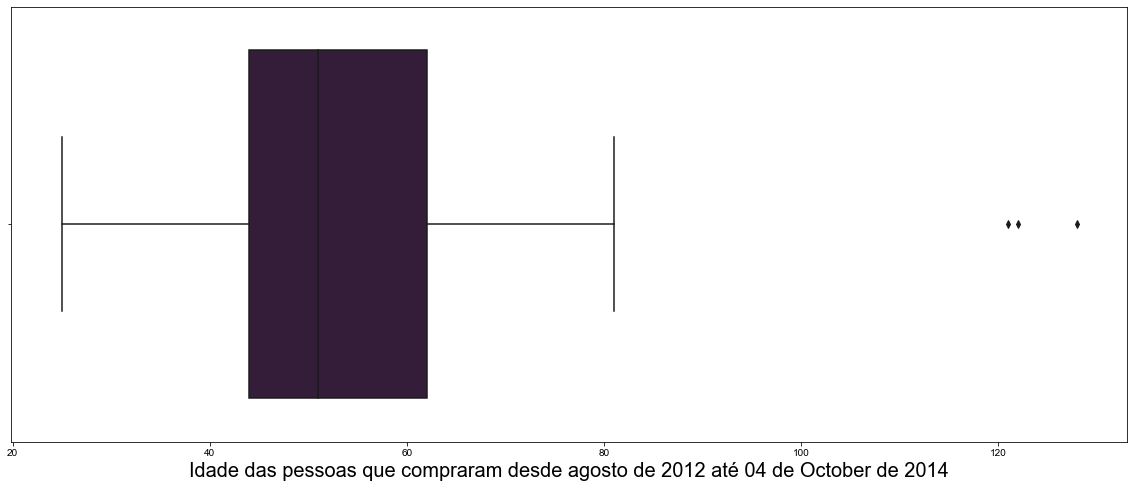

In [6]:
# Analise exploratória dos clientes baseada nas features | 'DtCustomer' & 'Recency' | 
# Desde a data de inscrição do cliente na empresa e numero de dias desde a última compra
import seaborn as sns
sns.set_palette("rocket")

ax = sns.boxplot(data = new_df, x = 'Age' )
ax.set_xlabel("Idade das pessoas que compraram desde agosto de 2012 até {}".format(data_ref.strftime('%d de %B de %Y')),
              fontsize = 20)
ax.figure.set_size_inches(20,8)
sns.set(font_scale = 1.8)

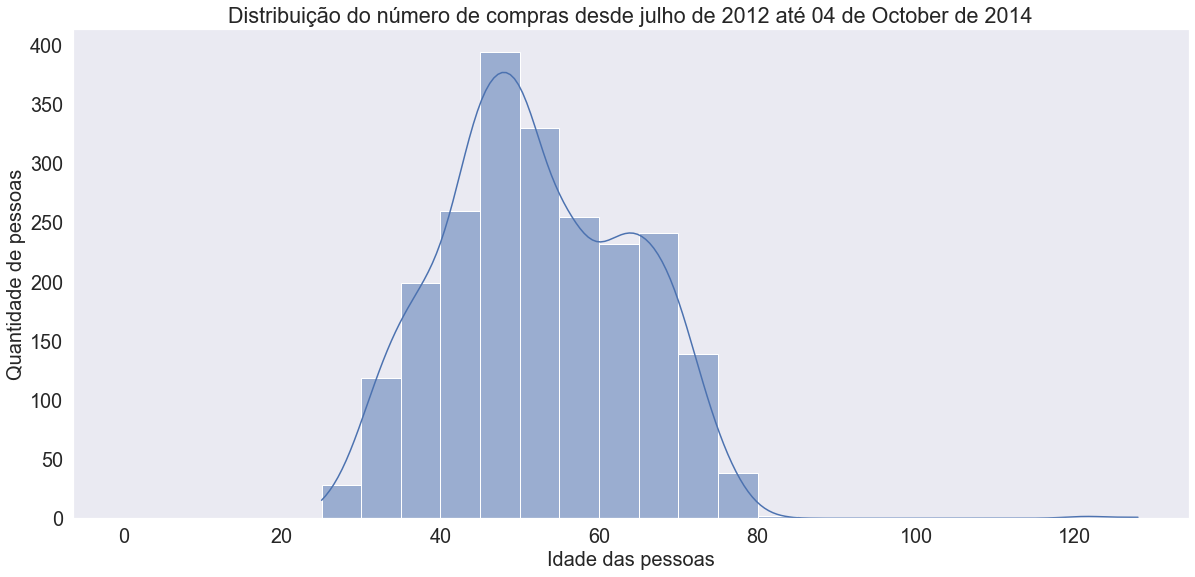

In [7]:
######
ax = sns.histplot(new_df.Age, kde = True,
                  bins = [i*5 for(i) in range (25)])
ax.set_xlabel("Idade das pessoas", 
              fontsize = 20, position=(0.5,0.5))
ax.set_ylabel("Quantidade de pessoas", 
              fontsize = 20, position=(0.5,0.5))
ax.grid(None)

ax.set_title('Distribuição do número de compras desde julho de 2012 até {}'.format(data_ref.strftime('%d de %B de %Y')))

ax.figure.set_size_inches(20,9)

In [8]:
#Criar a feature 'faixa' no dataframe para mostrar a faixa etária dos clientes

dados_filtrados = pd.DataFrame(new_df)

categories = ['De 21 a 30 anos',
                              'De 31 a 40 anos','De 41 a 50 anos','De 51 a 60 anos',
                              'De 61 a 70 anos','De 71 a 80 anos','De 81 a 90 anos','Mais de 90 anos']
faixa_idade = [20 , 30 , 40 , 50 , 60 , 
               70 , 80 , 90, 130]
dados_filtrados['faixa'] = pd.cut(dados_filtrados.Age,
                                  bins= faixa_idade,labels = categories, 
                                  include_lowest= True)

In [9]:
# Indexar feature 'Dt_last_Purchase' no dataframe com valores únicos
dados_filtrados.index = pd.to_datetime(dados_filtrados['Dt_Last_Purchase'])
dados_filtrados.faixa.unique();

In [10]:
#Agrupar feature 'Dt_Last_Purchase' do dataframe por Mês
dados_data = dados_filtrados.groupby(pd.Grouper(freq= 'M'))

In [11]:
# Criar rótulos dos grupos
dados_data.groups;

In [12]:
# Construir dataframe dos grupos com rótulos fornecidos
df1208 = dados_data.get_group('2012-08-31')
df1209 = dados_data.get_group('2012-09-30')
df1210 = dados_data.get_group('2012-10-31')
df1211 = dados_data.get_group('2012-11-30')
df1212 = dados_data.get_group('2012-12-31')
df1301 = dados_data.get_group('2013-01-31')
df1302 = dados_data.get_group('2013-02-28')
df1303 = dados_data.get_group('2013-03-31')
df1304 = dados_data.get_group('2013-04-30')
df1305 = dados_data.get_group('2013-05-31')
df1306 = dados_data.get_group('2013-06-30')
df1307 = dados_data.get_group('2013-07-31')
df1308 = dados_data.get_group('2013-08-31')
df1309 = dados_data.get_group('2013-09-30')
df1310 = dados_data.get_group('2013-10-31')
df1311 = dados_data.get_group('2013-11-30')
df1312 = dados_data.get_group('2013-12-31')
df1401 = dados_data.get_group('2014-01-31')
df1402 = dados_data.get_group('2014-02-28')
df1403 = dados_data.get_group('2014-03-31')
df1404 = dados_data.get_group('2014-04-30')
df1405 = dados_data.get_group('2014-05-31')
df1406 = dados_data.get_group('2014-06-30')
df1407 = dados_data.get_group('2014-07-31')
df1408 = dados_data.get_group('2014-08-31')
df1409 = dados_data.get_group('2014-09-30')
df1410 = dados_data.get_group('2014-10-31')

In [13]:
#
todos_meses = [df1208 ,df1209 ,df1210 ,df1211 ,df1212 ,
               df1301 ,df1302 ,df1303 ,df1304 ,df1305 ,
               df1306 ,df1307 ,df1308 ,df1309 ,df1310 ,
               df1311 ,df1312 ,df1401 ,df1402 ,df1403 ,
               df1404 ,df1405 ,df1406 ,df1407 ,df1408 , 
               df1409 ,df1410]
 
for i in range(0,len(todos_meses)):
    #print(i)
    todos_meses[i] = todos_meses[i].groupby('faixa').Age.count()

In [14]:
#Plotar eixo 
year = 2012
month = 8

for i in range(0,len(todos_meses)):
    #print(i)
    
        todos_meses[i].rename(("%04d" % year) + '-' + ("%02d" % month),inplace= True)
        month += 1
        if (month > 12):
                month = 1
                year += 1
        

In [15]:
# Criar a matriz do dataframe
de1208_ate1410 = pd.DataFrame()

for i in range(0,len(todos_meses)):
    de1208_ate1410 = de1208_ate1410.append(todos_meses[i])

In [16]:
# Criar a transposição da matriz do dataframe
de1208_ate1410 = de1208_ate1410.T

In [17]:
# Matriz transposta
de1208_ate1410

,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,...,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10
De 21 a 30 anos,0.0,0.0,2.0,3.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,1.0,2.0,1.0,4.0,1.0,3.0,0.0,0.0,0.0
De 31 a 40 anos,3.0,6.0,10.0,23.0,10.0,16.0,10.0,25.0,12.0,18.0,...,8.0,11.0,17.0,19.0,16.0,12.0,14.0,4.0,1.0,0.0
De 41 a 50 anos,4.0,16.0,35.0,30.0,34.0,37.0,23.0,24.0,31.0,29.0,...,32.0,23.0,30.0,35.0,30.0,31.0,23.0,14.0,3.0,1.0
De 51 a 60 anos,2.0,15.0,16.0,23.0,26.0,23.0,20.0,30.0,26.0,21.0,...,20.0,26.0,20.0,18.0,26.0,17.0,21.0,12.0,9.0,0.0
De 61 a 70 anos,3.0,12.0,17.0,19.0,21.0,12.0,25.0,27.0,21.0,21.0,...,23.0,16.0,23.0,23.0,25.0,17.0,18.0,6.0,2.0,2.0
De 71 a 80 anos,1.0,5.0,4.0,5.0,2.0,4.0,6.0,7.0,3.0,4.0,...,5.0,8.0,4.0,2.0,7.0,8.0,7.0,2.0,0.0,0.0
De 81 a 90 anos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mais de 90 anos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
#
de1208_ate1410_porcentagem = pd.DataFrame()

for mes in de1208_ate1410:
    de1208_ate1410_porcentagem[str(mes)] = (de1208_ate1410[mes].values/de1208_ate1410[mes].values.sum())

de1208_ate1410_porcentagem.index = de1208_ate1410.index

Text(0.5, 0, 'Ano-mês')

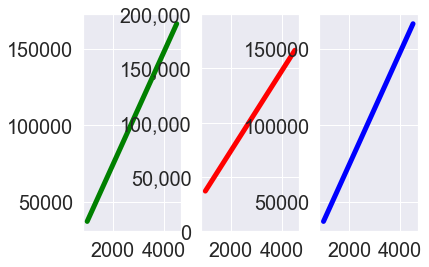

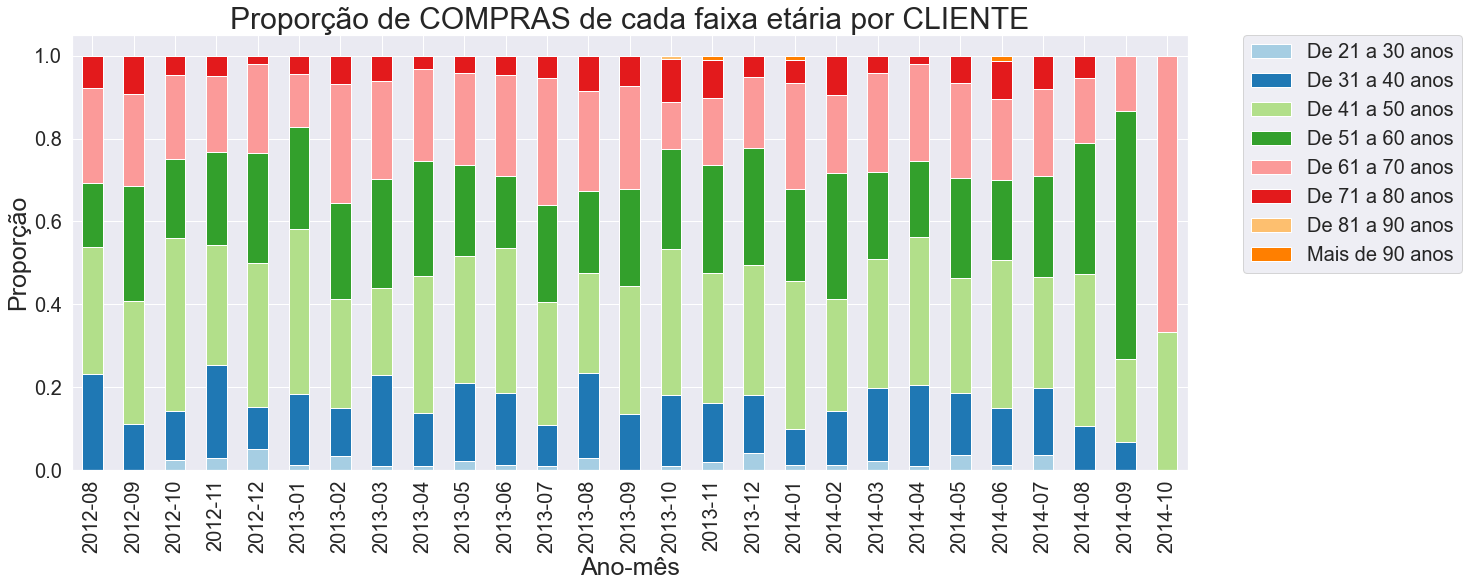

In [19]:
# Plotar gráfico

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker


mpl.rcParams['font.size'] = 6.5

x = np.array(range(1000, 5000, 500))
y = 37*x

fig, [ax1, ax2, ax3] = plt.subplots(1,3)

ax1.plot(x,y, linewidth=5, color='green')
ax2.plot(x,y, linewidth=5, color='red')
ax3.plot(x,y, linewidth=5, color='blue')

label_format = '{:,.0f}'

sns.set_palette("Paired")

ax = de1208_ate1410_porcentagem.T.plot(kind= 'bar' , stacked= True, figsize= (20,8),fontsize =20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 20)
# fixing yticks with "set_yticks"
ticks_loc = ax2.get_yticks().tolist()
ax2.set_yticks(ax1.get_yticks().tolist())
ax2.set_yticklabels([label_format.format(x) for x in ticks_loc])
#ax.set_yticklabels(['0%' , '20%', '40%' , '60%', '80%', '100%'])
ax.set_ylabel("Proporção",fontsize=25)
ax.set_title("Proporção de COMPRAS de cada faixa etária por CLIENTE", fontsize = 30)
ax.set_xticklabels(de1208_ate1410.columns, rotation=90)
ax.set_xlabel("Ano-mês",fontsize=25)

In [20]:
#Agora vamos ver qual foi a quantidade de clientes por faixa etária que aceitou ou não a oferta na última campanha  
#com todos os produtos e a média de gastos desses clientes

dados_filtrados.groupby(['faixa','Response']).agg({'MntWines': np.mean,'MntFruits': np.mean,'MntMeatProducts': np.mean,'MntFishProducts': np.mean,'MntSweetProducts': np.mean,'MntGoldProds': np.mean, 'ID': np.size})

MntWines  MntFruits  MntMeatProducts  \
faixa           Response                                           
De 21 a 30 anos 0         317.333333  33.636364       271.484848   
                1         641.200000  60.300000       495.300000   
De 31 a 40 anos 0         172.902174  23.608696       129.376812   
                1         498.121212  42.257576       326.833333   
De 41 a 50 anos 0         225.731908  20.972039       125.613487   
                1         371.819149  32.542553       244.840426   
De 51 a 60 anos 0         302.784314  25.252723       140.882353   
                1         551.453333  39.786667       282.573333   
De 61 a 70 anos 0         322.783333  25.880952       162.328571   
                1         568.300000  36.833333       308.283333   
De 71 a 80 anos 0         396.283019  29.896226       199.896226   
                1         627.827586  38.448276       313.275862   
De 81 a 90 anos 0         144.000000   0.000000         7.000000   
                1                NaN        NaN              NaN   
Mais de 90 anos 0         259.333333  50.000000       191.666667   
                1                NaN        NaN              NaN   

                          MntFishProducts  MntSweetProducts  MntGoldProds  \
faixa           Response                                                    
De 21 a 30 anos 0               48.424242         35.696970     57.121212   
                1              109.700000         61.400000     98.800000   
De 31 a 40 anos 0               34.750000         24.963768     35.539855   
                1               47.651515         34.393939     59.257576   
De 41 a 50 anos 0               30.896382         22.700658     37.019737   
                1               39.382979         37.617021     44.021277   
De 51 a 60 anos 0               34.220044         24.886710     43.572985   
                1               47.733333         32.760000     66.973333   
De 61 a 70 anos 0               39.402381         26.633333     46.723810   
                1               60.300000         44.366667     76.433333   
De 71 a 80 anos 0               40.792453         29.905660     37.764151   
                1               77.344828         47.068966     64.724138   
De 81 a 90 anos 0                0.000000          0.000000      6.000000   
                1                     NaN               NaN           NaN   
Mais de 90 anos 0               39.333333         22.666667     83.666667   
                1                     NaN               NaN           NaN   

                             ID  
faixa           Response         
De 21 a 30 anos 0          33.0  
                1          10.0  
De 31 a 40 anos 0         276.0  
                1          66.0  
De 41 a 50 anos 0         608.0  
                1          94.0  
De 51 a 60 anos 0         459.0  
                1          75.0  
De 61 a 70 anos 0         420.0  
                1          60.0  
De 71 a 80 anos 0         106.0  
                1          29.0  
De 81 a 90 anos 0           1.0  
                1           NaN  
Mais de 90 anos 0           3.0  
                1           NaN

In [21]:
# Consultando quantidade de clientes por faixa etária no periodo de Agosto2012 a Outubro2014

dados_filtrados.groupby(by='faixa').size()

faixa
De 21 a 30 anos     43
De 31 a 40 anos    342
De 41 a 50 anos    702
De 51 a 60 anos    534
De 61 a 70 anos    480
De 71 a 80 anos    135
De 81 a 90 anos      1
Mais de 90 anos      3
dtype: int64

In [22]:
import pandas as pd
subconjunto = pd.DataFrame(dados_filtrados)
subconjunto.set_index('ID', inplace=True)

In [23]:
#Criando os subconjuntos de entrada(features) e saida para o modelo preditivo
X=subconjunto.drop(columns=['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','MntWines','NumWebPurchases','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','NumDealsPurchases','Complain','Dt_Last_Purchase','Age','faixa'])
y=subconjunto['faixa']

# Aplicar Machine Learn
# Dividir o dataset em uma amostra de treino e teste aplicando uma porcentagem de 20% para ficar fora do teste 
# Os dados de treino são armazenados nos subconjuntos X e y  
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.2)

In [24]:
# Valores das entradas(features). Os clientes que aceitaram oferta em todas as campanhas
X

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
ID,,,,,,
5524,0,0,0,0,0,1
2174,0,0,0,0,0,0
4141,0,0,0,0,0,0
6182,0,0,0,0,0,0
5324,0,0,0,0,0,0
...,...,...,...,...,...,...
10870,0,0,0,0,0,0
4001,0,0,0,1,0,0
7270,0,1,0,0,0,0


In [25]:
# Valores das saidas. A faixa etária dos clientes que aceitaram as ofertas
y

ID
5524     De 61 a 70 anos
2174     De 61 a 70 anos
4141     De 51 a 60 anos
6182     De 31 a 40 anos
5324     De 31 a 40 anos
              ...       
10870    De 51 a 60 anos
4001     De 71 a 80 anos
7270     De 31 a 40 anos
8235     De 61 a 70 anos
9405     De 61 a 70 anos
Name: faixa, Length: 2240, dtype: category
Categories (8, object): ['De 21 a 30 anos' < 'De 31 a 40 anos' < 'De 41 a 50 anos' < 'De 51 a 60 anos' < 'De 61 a 70 anos' < 'De 71 a 80 anos' < 'De 81 a 90 anos' < 'Mais de 90 anos']

In [26]:
#Definir classificação do modelo usando o algoritmo de Machine Learning - Decision Tree
modelo=DecisionTreeClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=3)

#Fazer o treinamento do modelo passando os parâmetros X(features) e y(saídas)
modelo.fit(X_treino, y_treino)


DecisionTreeClassifier(max_depth=3, random_state=1986)

In [27]:
#Prever os rótulos dos valores de dados com base no modelo treinado
previsao=modelo.predict(X_teste)

In [28]:
#Previsão gerada separando 80% dos dados de entrada para treino
previsao

array(['De 51 a 60 anos', 'De 41 a 50 anos', 'De 41 a 50 anos',
       'De 41 a 50 anos', 'De 41 a 50 anos', 'De 51 a 60 anos',
       'De 51 a 60 anos', 'De 41 a 50 anos', 'De 41 a 50 anos',
       'De 41 a 50 anos', 'De 41 a 50 anos', 'De 41 a 50 anos',
       'De 41 a 50 anos', 'De 51 a 60 anos', 'De 51 a 60 anos',
       'De 41 a 50 anos', 'De 41 a 50 anos', 'De 51 a 60 anos',
       'De 41 a 50 anos', 'De 41 a 50 anos', 'De 41 a 50 anos',
       'De 51 a 60 anos', 'De 41 a 50 anos', 'De 41 a 50 anos',
       'De 41 a 50 anos', 'De 41 a 50 anos', 'De 41 a 50 anos',
       'De 61 a 70 anos', 'De 41 a 50 anos', 'De 41 a 50 anos',
       'De 41 a 50 anos', 'De 41 a 50 anos', 'De 41 a 50 anos',
       'De 41 a 50 anos', 'De 51 a 60 anos', 'De 51 a 60 anos',
       'De 41 a 50 anos', 'De 41 a 50 anos', 'De 41 a 50 anos',
       'De 41 a 50 anos', 'De 41 a 50 anos', 'De 41 a 50 anos',
       'De 41 a 50 anos', 'De 41 a 50 anos', 'De 41 a 50 anos',
       'De 41 a 50 anos', 'De 41 a 50 an

In [29]:
#Medir e Melhorar acurácia da previsão
medir = accuracy_score(y_teste, previsao)
medir

0.29464285714285715

In [30]:
#Agora vamos ver qual foi a média de idade e a quantidade de clientes por faixa etária que aceitou ou não a oferta  
#em todas as campanhas e a média de aceitação da oferta desses clientes 

dados_filtrados.groupby(['faixa','Response']).agg({'Age': np.mean,'AcceptedCmp1': np.mean,'AcceptedCmp2': np.mean,'AcceptedCmp3': np.mean,'AcceptedCmp4': np.mean,'AcceptedCmp5': np.mean,'ID': np.size})

Age  AcceptedCmp1  AcceptedCmp2  \
faixa           Response                                           
De 21 a 30 anos 0          28.636364      0.060606      0.030303   
                1          28.300000      0.300000      0.000000   
De 31 a 40 anos 0          35.923913      0.036232      0.003623   
                1          36.621212      0.272727      0.045455   
De 41 a 50 anos 0          45.881579      0.018092      0.004934   
                1          46.457447      0.234043      0.031915   
De 51 a 60 anos 0          55.000000      0.034858      0.004357   
                1          54.760000      0.186667      0.106667   
De 61 a 70 anos 0          65.378571      0.045238      0.007143   
                1          65.333333      0.233333      0.100000   
De 71 a 80 anos 0          73.339623      0.066038      0.000000   
                1          73.620690      0.275862      0.000000   
De 81 a 90 anos 0          81.000000      0.000000      0.000000   
                1                NaN           NaN           NaN   
Mais de 90 anos 0         123.666667      0.000000      0.000000   
                1                NaN           NaN           NaN   

                          AcceptedCmp3  AcceptedCmp4  AcceptedCmp5     ID  
faixa           Response                                                   
De 21 a 30 anos 0             0.060606      0.030303      0.090909   33.0  
                1             0.200000      0.300000      0.600000   10.0  
De 31 a 40 anos 0             0.076087      0.032609      0.043478  276.0  
                1             0.272727      0.151515      0.378788   66.0  
De 41 a 50 anos 0             0.042763      0.041118      0.026316  608.0  
                1             0.287234      0.138298      0.212766   94.0  
De 51 a 60 anos 0             0.039216      0.067538      0.032680  459.0  
                1             0.186667      0.200000      0.213333   75.0  
De 61 a 70 anos 0             0.035714      0.069048      0.035714  420.0  
                1             0.166667      0.250000      0.266667   60.0  
De 71 a 80 anos 0             0.037736      0.094340      0.084906  106.0  
                1             0.206897      0.206897      0.310345   29.0  
De 81 a 90 anos 0             0.000000      0.000000      0.000000    1.0  
                1                  NaN           NaN           NaN    NaN  
Mais de 90 anos 0             0.000000      0.000000      0.333333    3.0  
                1                  NaN           NaN           NaN    NaN

In [31]:
import pandas as pd
subconjunto = pd.DataFrame(dados_filtrados)
subconjunto.set_index('ID', inplace=True)

In [32]:
#Criando os subconjuntos de entrada(features) e saida para o modelo preditivo
F=subconjunto.drop(columns=['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','NumDealsPurchases','Complain','Dt_Last_Purchase','Age','faixa','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'])
o=subconjunto['Education']

# Aplicar Machine Learn
# Dividir o dataset em uma amostra de treino e teste aplicando uma porcentagem de 20% para ficar fora do teste 
# Os dados de treino são armazenados nos subconjuntos X e y  
F_treino, F_teste, o_treino, o_teste = train_test_split(F,o, test_size=0.2)

In [33]:
#Clientes que compraram Wine na última campanha
F

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Response
ID,,,,,,,
5524,635,88,546,172,88,88,1
2174,11,1,6,2,1,6,0
4141,426,49,127,111,21,42,0
6182,11,4,20,10,3,5,0
5324,173,43,118,46,27,15,0
...,...,...,...,...,...,...,...
10870,709,43,182,42,118,247,0
4001,406,0,30,0,0,8,0
7270,908,48,217,32,12,24,0


In [34]:
#Nível educacional dos clientes que compraram produtos na última
o

ID
5524     Graduation
2174     Graduation
4141     Graduation
6182     Graduation
5324            PhD
            ...    
10870    Graduation
4001            PhD
7270     Graduation
8235         Master
9405            PhD
Name: Education, Length: 2240, dtype: object

In [35]:
#Definir classificação do modelo usando o algoritmo de Machine Learning - Decision Tree
wine=DecisionTreeClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=3)

#Fazer o treinamento do modelo passando os parâmetros F(features) e o(saídas)
wine.fit(F_treino, o_treino)

DecisionTreeClassifier(max_depth=3, random_state=1986)

In [36]:
#Prever as faixas etárias com base no modelo treinado
previsao=wine.predict(F_teste)

In [37]:
#Previsão gerada separando 80% dos dados de entrada para treino
previsao

array(['Graduation', 'Graduation', 'Graduation', 'Graduation',
       'Graduation', 'Graduation', 'Graduation', 'Graduation',
       'Graduation', 'Graduation', 'Graduation', 'PhD', 'Graduation',
       'Graduation', 'Graduation', 'Graduation', 'Graduation',
       'Graduation', 'Graduation', 'PhD', 'Graduation', 'Graduation',
       'Graduation', 'Graduation', 'Graduation', 'Graduation',
       'Graduation', 'Graduation', 'Graduation', 'Graduation',
       'Graduation', 'Graduation', 'Graduation', 'Graduation',
       'Graduation', 'Graduation', 'Graduation', 'Graduation',
       'Graduation', 'Graduation', 'Graduation', 'PhD', 'Graduation',
       'Graduation', 'Graduation', 'Graduation', 'Graduation',
       'Graduation', 'Graduation', 'Graduation', 'Graduation',
       'Graduation', 'Graduation', 'PhD', 'Graduation', 'Graduation',
       'Graduation', 'PhD', 'Graduation', 'Graduation', 'Graduation',
       'Graduation', 'Graduation', 'Graduation', 'Graduation', 'PhD',
       'Gradu

In [38]:
#Medir e Melhorar acurácia da previsão
medir = accuracy_score(o_teste, previsao)
medir

0.53125

In [39]:
#Agora vamos ver qual foi a média de idade e quantidade de clientes por nível educacional que aceitou ou não a oferta na última campanha  
#com todos os produtos e a média de valores gastos desses clientes

dados_filtrados.groupby(['Education','Response']).agg({'Age': np.mean,'MntWines': np.mean,'MntFruits': np.mean,'MntMeatProducts': np.mean,'MntFishProducts': np.mean,'MntSweetProducts': np.mean,'MntGoldProds': np.mean, 'ID': np.size})

Age    MntWines  MntFruits  MntMeatProducts  \
Education  Response                                                      
2n Cycle   0         49.138122  177.690608  28.911602       125.292818   
           1         47.636364  366.772727  29.318182       272.590909   
Basic      0         43.365385    7.384615  11.096154        11.442308   
           1         48.000000    3.500000  11.500000        11.500000   
Graduation 0         51.454359  254.624615  28.056410       156.887179   
           1         50.789474  474.421053  48.210526       324.467105   
Master     0         54.453674  303.664537  19.523962       135.357827   
           1         52.298246  494.578947  33.350877       317.245614   
PhD        0         55.389610  356.002597  17.872727       148.179221   
           1         53.306931  589.346535  28.346535       246.455446   

                     MntFishProducts  MntSweetProducts  MntGoldProds   ID  
Education  Response                                                        
2n Cycle   0               46.674033         31.801105     42.988950  181  
           1               54.136364         54.409091     74.454545   22  
Basic      0               17.596154         12.250000     22.846154   52  
           1                3.000000          8.500000     22.500000    2  
Graduation 0               40.351795         29.686154     47.636923  975  
           1               61.098684         42.151316     71.453947  152  
Master     0               29.335463         17.881789     36.575080  313  
           1               47.280702         39.263158     61.385965   57  
PhD        0               22.815584         17.618182     29.150649  385  
           1               41.643564         30.148515     44.356436  101

In [40]:
#Criando os subconjuntos de entrada(features) e saida para o modelo preditivo
M=subconjunto.drop(columns=['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','NumDealsPurchases','Complain','Dt_Last_Purchase','Age','faixa','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'])
s=subconjunto['Marital_Status']

# Aplicar Machine Learn
# Dividir o dataset em uma amostra de treino e teste aplicando uma porcentagem de 20% para ficar fora do teste 
# Os dados de treino são armazenados nos subconjuntos X e y  
M_treino, M_teste, s_treino, s_teste = train_test_split(M,s, test_size=0.2)

In [41]:
#Clientes que compraram Wine na última campanha
M

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Response
ID,,,,,,,
5524,635,88,546,172,88,88,1
2174,11,1,6,2,1,6,0
4141,426,49,127,111,21,42,0
6182,11,4,20,10,3,5,0
5324,173,43,118,46,27,15,0
...,...,...,...,...,...,...,...
10870,709,43,182,42,118,247,0
4001,406,0,30,0,0,8,0
7270,908,48,217,32,12,24,0


In [42]:
#Estado civil dos clientes que compraram vinho na última
s

ID
5524       Single
2174       Single
4141     Together
6182     Together
5324      Married
           ...   
10870     Married
4001     Together
7270     Divorced
8235     Together
9405      Married
Name: Marital_Status, Length: 2240, dtype: object

In [43]:
#Definir classificação do modelo usando o algoritmo de Machine Learning - Decision Tree
wines=DecisionTreeClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=3)

#Fazer o treinamento do modelo passando os parâmetros F(features) e o(saídas)
wines.fit(M_treino, s_treino)

DecisionTreeClassifier(max_depth=3, random_state=1986)

In [44]:
#Prever o estado civil com base no modelo treinado
previsao=wines.predict(M_teste)

In [45]:
#Previsão gerada separando 80% dos dados de entrada para treino
previsao

array(['Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Single', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Single', 'Together', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', '

In [46]:
#Medir e Melhorar acurácia da previsão
medir = accuracy_score(s_teste, previsao)
medir

0.3549107142857143

In [47]:
#Agora vamos ver qual foi a média de idade e a quantidade de clientes por estado civil que aceitou ou não a oferta na última campanha  
#com todos os produtos e a média de gastos desses clientes

dados_filtrados.groupby(['Marital_Status','Response']).agg({'Age': np.mean,'MntWines': np.mean,'MntFruits': np.mean,'MntMeatProducts': np.mean,'MntFishProducts': np.mean,'MntSweetProducts': np.mean,'MntGoldProds': np.mean, 'ID': np.size})

Age    MntWines   MntFruits  MntMeatProducts  \
Marital_Status Response                                                       
Absurd         0         64.000000  240.000000   67.000000       500.000000   
               1         28.000000  471.000000  102.000000       125.000000   
Alone          0         48.000000  269.500000    6.000000        35.500000   
               1         48.000000   15.000000    0.000000         8.000000   
Divorced       0         54.869565  284.967391   22.277174       112.597826   
               1         54.166667  477.708333   47.166667       294.375000   
Married        0         51.605744  271.586162   24.620104       146.516971   
               1         49.969388  517.510204   34.448980       271.397959   
Single         0         49.735294  234.425134   23.227273       141.147059   
               1         48.716981  478.528302   39.566038       326.632075   
Together       0         53.203846  280.044231   24.082692       154.021154   
               1         53.683333  538.933333   36.333333       290.150000   
Widow          0         61.810345  311.120690   32.879310       158.672414   
               1         64.368421  546.789474   33.736842       282.736842   
YOLO           0         48.000000  322.000000    3.000000        50.000000   
               1         48.000000  322.000000    3.000000        50.000000   

                         MntFishProducts  MntSweetProducts  MntGoldProds   ID  
Marital_Status Response                                                        
Absurd         0              199.000000          0.000000    163.000000    1  
               1              212.000000         61.000000    245.000000    1  
Alone          0                9.500000          9.500000     30.500000    2  
               1                4.000000          2.000000     20.000000    1  
Divorced       0               29.081522         21.728261     39.929348  184  
               1               57.895833         46.333333     70.666667   48  
Married        0               33.318538         25.971279     40.507833  766  
               1               51.500000         32.408163     60.918367   98  
Single         0               33.860963         22.550802     41.443850  374  
               1               53.584906         43.886792     51.792453  106  
Together       0               38.253846         24.928846     40.707692  520  
               1               45.383333         36.466667     62.816667   60  
Widow          0               52.086207         41.482759     47.862069   58  
               1               49.263158         31.473684     83.947368   19  
YOLO           0                4.000000          3.000000     42.000000    1  
               1                4.000000          3.000000     42.000000    1

In [48]:
#Agora vamos ver qual foi a média de idade e a quantidade de clientes por estado civil que aceitou ou não a oferta na última campanha  
#com todos os produtos e a média de pagamentos nos canais online e off-line desses clientes 

dados_filtrados.groupby(['Marital_Status','Response']).agg({'Age': np.mean,'NumDealsPurchases': np.mean,'NumCatalogPurchases': np.mean,'NumStorePurchases': np.mean,'NumWebPurchases': np.mean,'NumWebVisitsMonth': np.mean,'ID': np.size})

Age  NumDealsPurchases  NumCatalogPurchases  \
Marital_Status Response                                                      
Absurd         0         64.000000           3.000000             5.000000   
               1         28.000000           1.000000            10.000000   
Alone          0         48.000000           4.500000             0.500000   
               1         48.000000           2.000000             1.000000   
Divorced       0         54.869565           2.413043             2.222826   
               1         54.166667           2.520833             4.395833   
Married        0         51.605744           2.394256             2.411227   
               1         49.969388           2.377551             4.295918   
Single         0         49.735294           2.160428             2.237968   
               1         48.716981           2.028302             3.877358   
Together       0         53.203846           2.300000             2.484615   
               1         53.683333           2.533333             4.333333   
Widow          0         61.810345           2.224138             2.879310   
               1         64.368421           2.684211             4.684211   
YOLO           0         48.000000           5.000000             1.000000   
               1         48.000000           5.000000             1.000000   

                         NumStorePurchases  NumWebPurchases  \
Marital_Status Response                                       
Absurd         0                  6.000000         3.000000   
               1                  7.000000         4.000000   
Alone          0                  5.000000         7.000000   
               1                  2.000000         1.000000   
Divorced       0                  5.630435         4.114130   
               1                  6.541667         5.062500   
Married        0                  5.844648         3.960836   
               1                  5.897959         5.081633   
Single         0                  5.443850         3.628342   
               1                  6.330189         4.735849   
Together       0                  5.753846         3.913462   
               1                  5.583333         5.533333   
Widow          0                  6.396552         4.293103   
               1                  6.473684         5.631579   
YOLO           0                  6.000000         7.000000   
               1                  6.000000         7.000000   

                         NumWebVisitsMonth   ID  
Marital_Status Response                          
Absurd         0                  2.000000    1  
               1                  1.000000    1  
Alone          0                  7.000000    2  
               1                  5.000000    1  
Divorced       0                  5.690217  184  
               1                  4.708333   48  
Married        0                  5.348564  766  
               1                  5.489796   98  
Single         0                  5.320856  374  
               1                  5.150943  106  
Together       0                  5.207692  520  
               1                  5.716667   60  
Widow          0                  4.741379   58  
               1                  5.315789   19  
YOLO           0                  8.000000    1  
               1                  8.000000    1

In [49]:
#Criando os subconjuntos de entrada(features) e saida para o modelo preditivo
K=subconjunto.drop(columns=['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Complain','Dt_Last_Purchase','Age','faixa','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'])
w=subconjunto['Marital_Status']

# Aplicar Machine Learn
# Dividir o dataset em uma amostra de treino e teste aplicando uma porcentagem de 20% para ficar fora do teste 
# Os dados de treino são armazenados nos subconjuntos X e y  
K_treino, K_teste, w_treino, w_teste = train_test_split(K,w, test_size=0.2)

In [50]:
#Clientes que compraram ONLINE e OFFLINE na última campanha
K

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
ID,,,,,,
5524,3,8,10,4,7,1
2174,2,1,1,2,5,0
4141,1,8,2,10,4,0
6182,2,2,0,4,6,0
5324,5,5,3,6,5,0
...,...,...,...,...,...,...
10870,2,9,3,4,5,0
4001,7,8,2,5,7,0
7270,1,2,3,13,6,0


In [51]:
#Estado civil dos clientes que compraram ONLINE e OFFLINE na última
w

ID
5524       Single
2174       Single
4141     Together
6182     Together
5324      Married
           ...   
10870     Married
4001     Together
7270     Divorced
8235     Together
9405      Married
Name: Marital_Status, Length: 2240, dtype: object

In [52]:
#Definir classificação do modelo usando o algoritmo de Machine Learning - Decision Tree
canal=DecisionTreeClassifier(random_state=1986,
                           criterion='gini',
                           max_depth=3)

#Fazer o treinamento do modelo passando os parâmetros K(features) e w(saídas)
canal.fit(K_treino, w_treino)

DecisionTreeClassifier(max_depth=3, random_state=1986)

In [53]:
#Prever o estado civil com base no modelo treinado
previsao=canal.predict(K_teste)

In [54]:
#Previsão gerada separando 80% dos dados de entrada para treino
previsao

array(['Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 'Married', 'Married',
       'Married', 'Married', 'Married', 'Married', 

In [55]:
#Medir e Melhorar acurácia da previsão
medir = accuracy_score(w_teste, previsao)
medir

0.3794642857142857